In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer(ngram_range=(1,3))
v.fit(["Agnik Bishi is an ai engineer at google"])
v.vocabulary_

{'agnik': 0,
 'bishi': 11,
 'is': 18,
 'an': 6,
 'ai': 3,
 'engineer': 14,
 'at': 9,
 'google': 17,
 'agnik bishi': 1,
 'bishi is': 12,
 'is an': 19,
 'an ai': 7,
 'ai engineer': 4,
 'engineer at': 15,
 'at google': 10,
 'agnik bishi is': 2,
 'bishi is an': 13,
 'is an ai': 20,
 'an ai engineer': 8,
 'ai engineer at': 5,
 'engineer at google': 16}

In [6]:
corpus = ["Agnik Bishi is an ai engineer at google",
          "callable at google",
          "google is a tech company",
          "Agnik Bishi is a data scientist at google"]

In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")


def preprocess(text):
    doc= nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return" ".join(filtered_tokens)    

In [8]:
corpus_process = [preprocess(text) for text in corpus]
corpus_process

['Agnik Bishi ai engineer google',
 'callable google',
 'google tech company',
 'Agnik Bishi data scientist google']

In [9]:
v = CountVectorizer(ngram_range = (1,2))
v.fit(corpus_process)
v.vocabulary_

{'agnik': 0,
 'bishi': 4,
 'ai': 2,
 'engineer': 12,
 'google': 14,
 'agnik bishi': 1,
 'bishi ai': 5,
 'ai engineer': 3,
 'engineer google': 13,
 'callable': 7,
 'callable google': 8,
 'tech': 18,
 'company': 9,
 'google tech': 15,
 'tech company': 19,
 'data': 10,
 'scientist': 16,
 'bishi data': 6,
 'data scientist': 11,
 'scientist google': 17}

In [10]:
v.transform(corpus_process).toarray()

array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]],
      dtype=int64)

In [11]:
import pandas as pd
import numpy as np
df= pd.read_json("news_dataset.json")
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [12]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [13]:
min_samples = 1381
df_business = df[df.category == "BUSINESS"].sample(min_samples,random_state = 2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples,random_state = 2022)
df_crime = df[df.category == "CRIME"].sample(min_samples,random_state = 2022)
df_science = df[df.category == "SCIENCE"].sample(min_samples,random_state = 2022)


In [14]:
df_balanced =  pd.concat([df_business,df_sports,df_crime,df_science],axis = 0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [15]:
df_balanced['category_num']= df_balanced.category.map({
    "BUSINESS":0,
    "SPORTS":1,
    "CRIME":2,
    "SCIENCE":3
})

In [16]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df_balanced.category_num
)

In [18]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer()),
    ('Multi NB',MultinomialNB())
])
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [22]:
df_balanced['preprocessed_text'] = df_balanced.text.apply(preprocess)

In [23]:
df_balanced.head()

,text,category,category_num,preprocessed_text
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business leader remain confident Face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review Employees wake morning love impo...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment CEO FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df_balanced.category_num
)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range = (1,2))),
    ('Multi NB',MultinomialNB())
])
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[249,   6,  13,   8],
       [ 32, 206,  33,   6],
       [ 28,   2, 242,   4],
       [ 52,   3,   7, 214]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

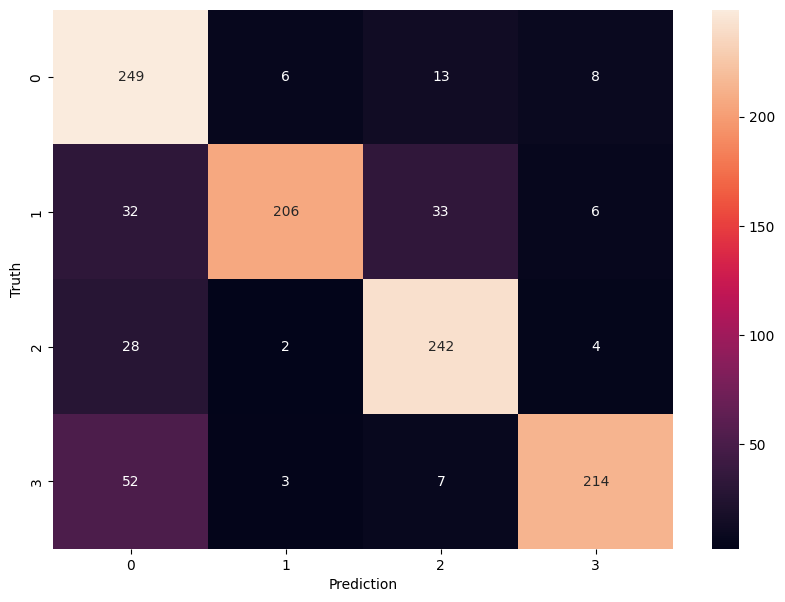

In [27]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')

